# Analysez des données de systèmes éducatifs

## Table des matières

Dans ce projet, nous explorons un ensemble de données lié aux systèmes éducatifs dans différents pays du monde. L’objectif principal est d’évaluer la qualité et la pertinence des données disponibles, d’identifier les variables les plus informatives, et de réaliser une analyse statistique approfondie afin de dégager des tendances, corrélations et différences géographiques.

Ce travail s'inscrit dans une démarche de **Data Analysis** structurée, comprenant :

- Une **exploration des données (EDA)** pour comprendre leur nature et leur distribution.
- Un **nettoyage et traitement des données manquantes** pour fiabiliser les analyses.
- Des **visualisations claires et interprétables** pour communiquer efficacement les résultats.
- Une **analyse comparative par pays et par continents**, afin de détecter des disparités ou des similitudes significatives.

Ce projet a été réalisé en Python, à l’aide de bibliothèques classiques du domaine telles que `pandas`, `matplotlib`, `seaborn` ou encore `missingno`, dans le but de fournir une vue d’ensemble compréhensible, professionnelle et exploitable par toute personne intéressée par l’éducation à l’échelle mondiale.

## 1ère partie

### Importer les libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Charger le jeu de donnée

#### 5 dataframe

In [2]:
import opendatasets as od
import urllib.request

In [3]:
od.version()

'0.1.22'

In [4]:
import requests
import zipfile
import os
import pandas as pd

# Télécharger le fichier zip
url = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Données+éducatives/Projet+Python_Dataset_Edstats_csv.zip"
response = requests.get(url)

# Sauvegarder le fichier zip
zip_path = "datasets_projet_2.zip"
with open(zip_path, "wb") as f:
    f.write(response.content)

# Extraire le fichier zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("datasets_projet_2")

# Vérifier si les fichiers CSV sont présents
data_dir = "./datasets_projet_2"
csv_files = ["EdStatsCountry.csv", "EdStatsCountry-Series.csv", "EdStatsData.csv", "EdStatsFootNote.csv", "EdStatsSeries.csv"]

missing_files = [file for file in csv_files if file not in os.listdir(data_dir)]
if missing_files:
    print(f"Les fichiers suivants sont introuvables dans le répertoire {data_dir} : {missing_files}")
else:
    print(f"Tous les fichiers CSV sont présents dans le répertoire {data_dir}.")

# Importer les fichiers CSV en tant que DataFrames
country_series_path = os.path.join(data_dir, "EdStatsCountry-Series.csv")
country_path = os.path.join(data_dir, "EdStatsCountry.csv")
indicator_path = os.path.join(data_dir, "EdStatsData.csv")
description_path = os.path.join(data_dir, "EdStatsFootNote.csv")
topic_path = os.path.join(data_dir, "EdStatsSeries.csv")

country_series = pd.read_csv(country_series_path)
country = pd.read_csv(country_path)
indicator = pd.read_csv(indicator_path)
description = pd.read_csv(description_path)
topic = pd.read_csv(topic_path)

# Afficher les premières lignes de chaque DataFrame pour vérifier l'importation
print(country_series.head())
print(country.head())
print(indicator.head())
print(description.head())
print(topic.head())

Tous les fichiers CSV sont présents dans le répertoire ./datasets_projet_2.
  CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN  
  Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3        

### Description des jeux de données

In [5]:
country_series.shape # 613 lignes et 4 colonnes

(613, 4)

In [6]:
country_series.dtypes.nunique() # Parmi ces 4 colonnes, 3 contiennent des chaînes de caractères et 1 contient un nombre décimal.

2

In [7]:
country_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [8]:
country_series.duplicated().sum() # 0 valeur dupliquée

0

<Axes: >

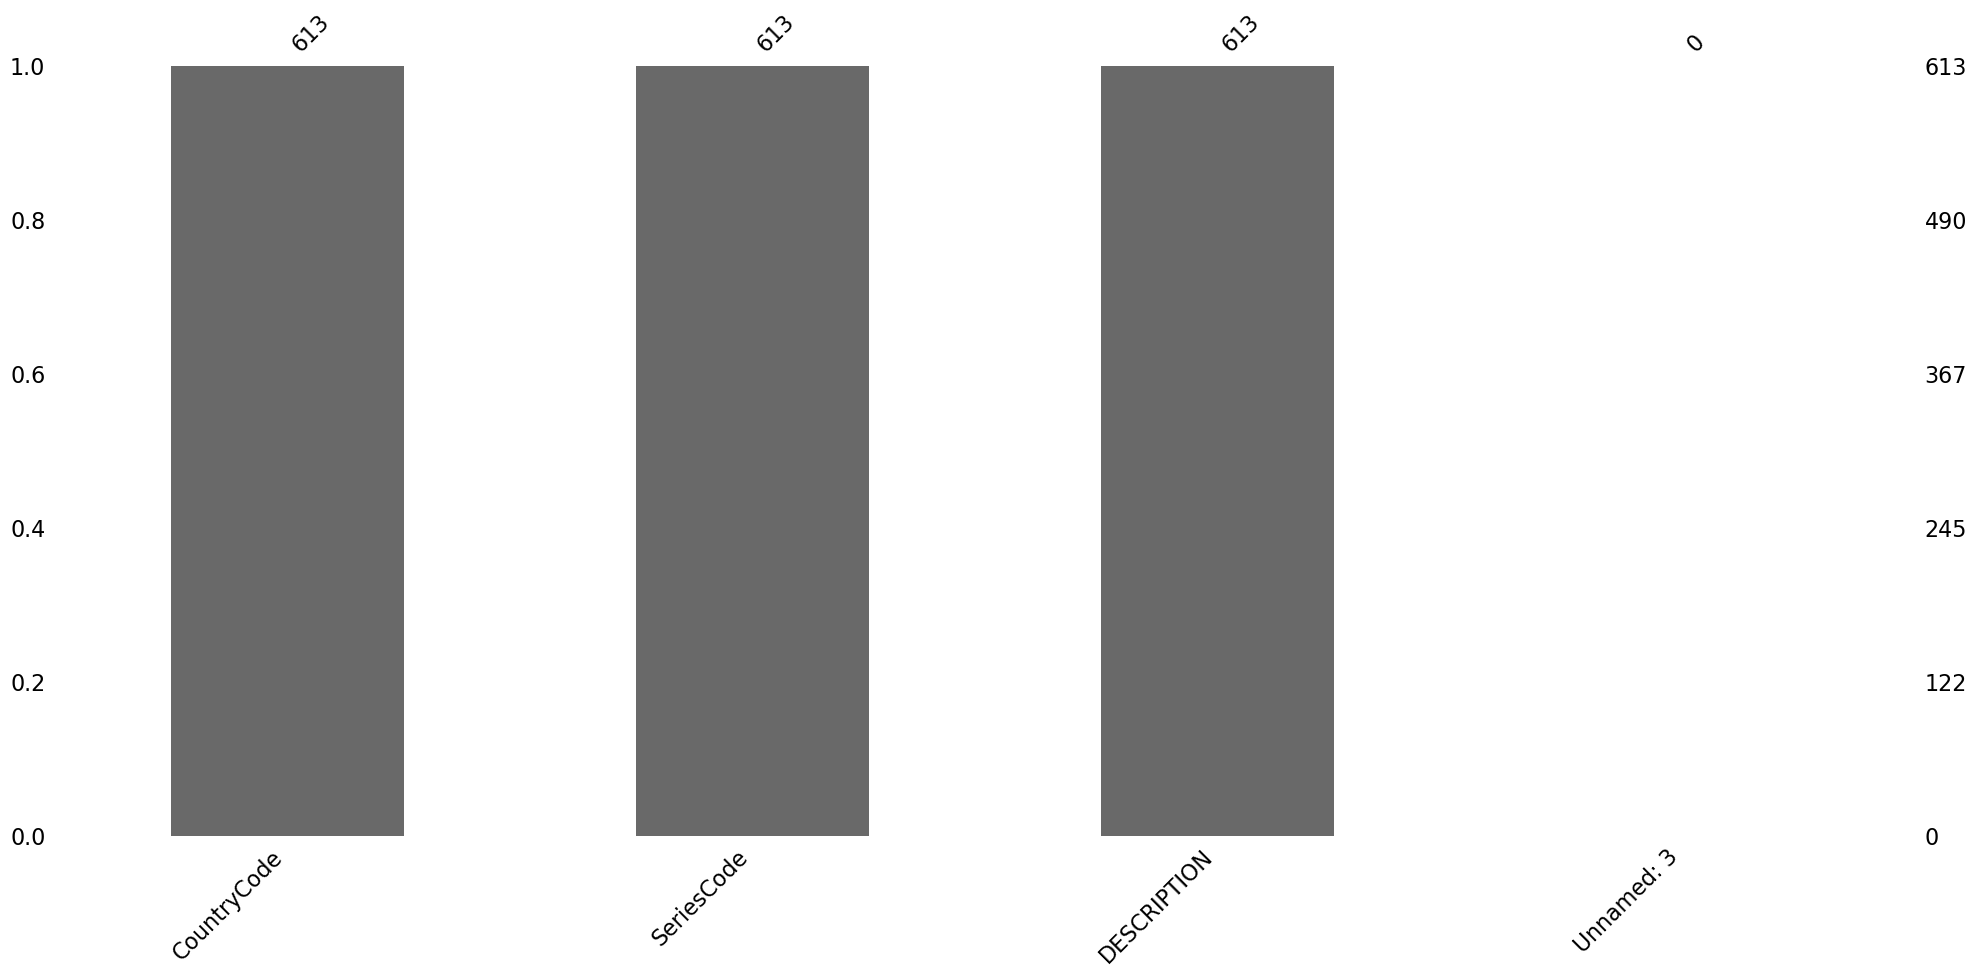

In [9]:
msno.bar(country_series) # La colonne "Unnamed : 3" contient 100% de valeurs manquantes et le restes ont un taux de remplissage de 100%.

In [10]:
country.shape # 241 lignes et 32 colonnes

(241, 32)

In [11]:
country.dtypes.nunique() # les colonnes contiennent principalement des objets (string) et quelques float(nombre décimal).

2

In [12]:
country.isnull().sum().sort_values(ascending=False).head()

Unnamed: 31                         241
National accounts reference year    209
Alternative conversion factor       194
Other groups                        183
Latest industrial data              134
dtype: int64

In [13]:
country.duplicated().sum()

0

<Axes: >

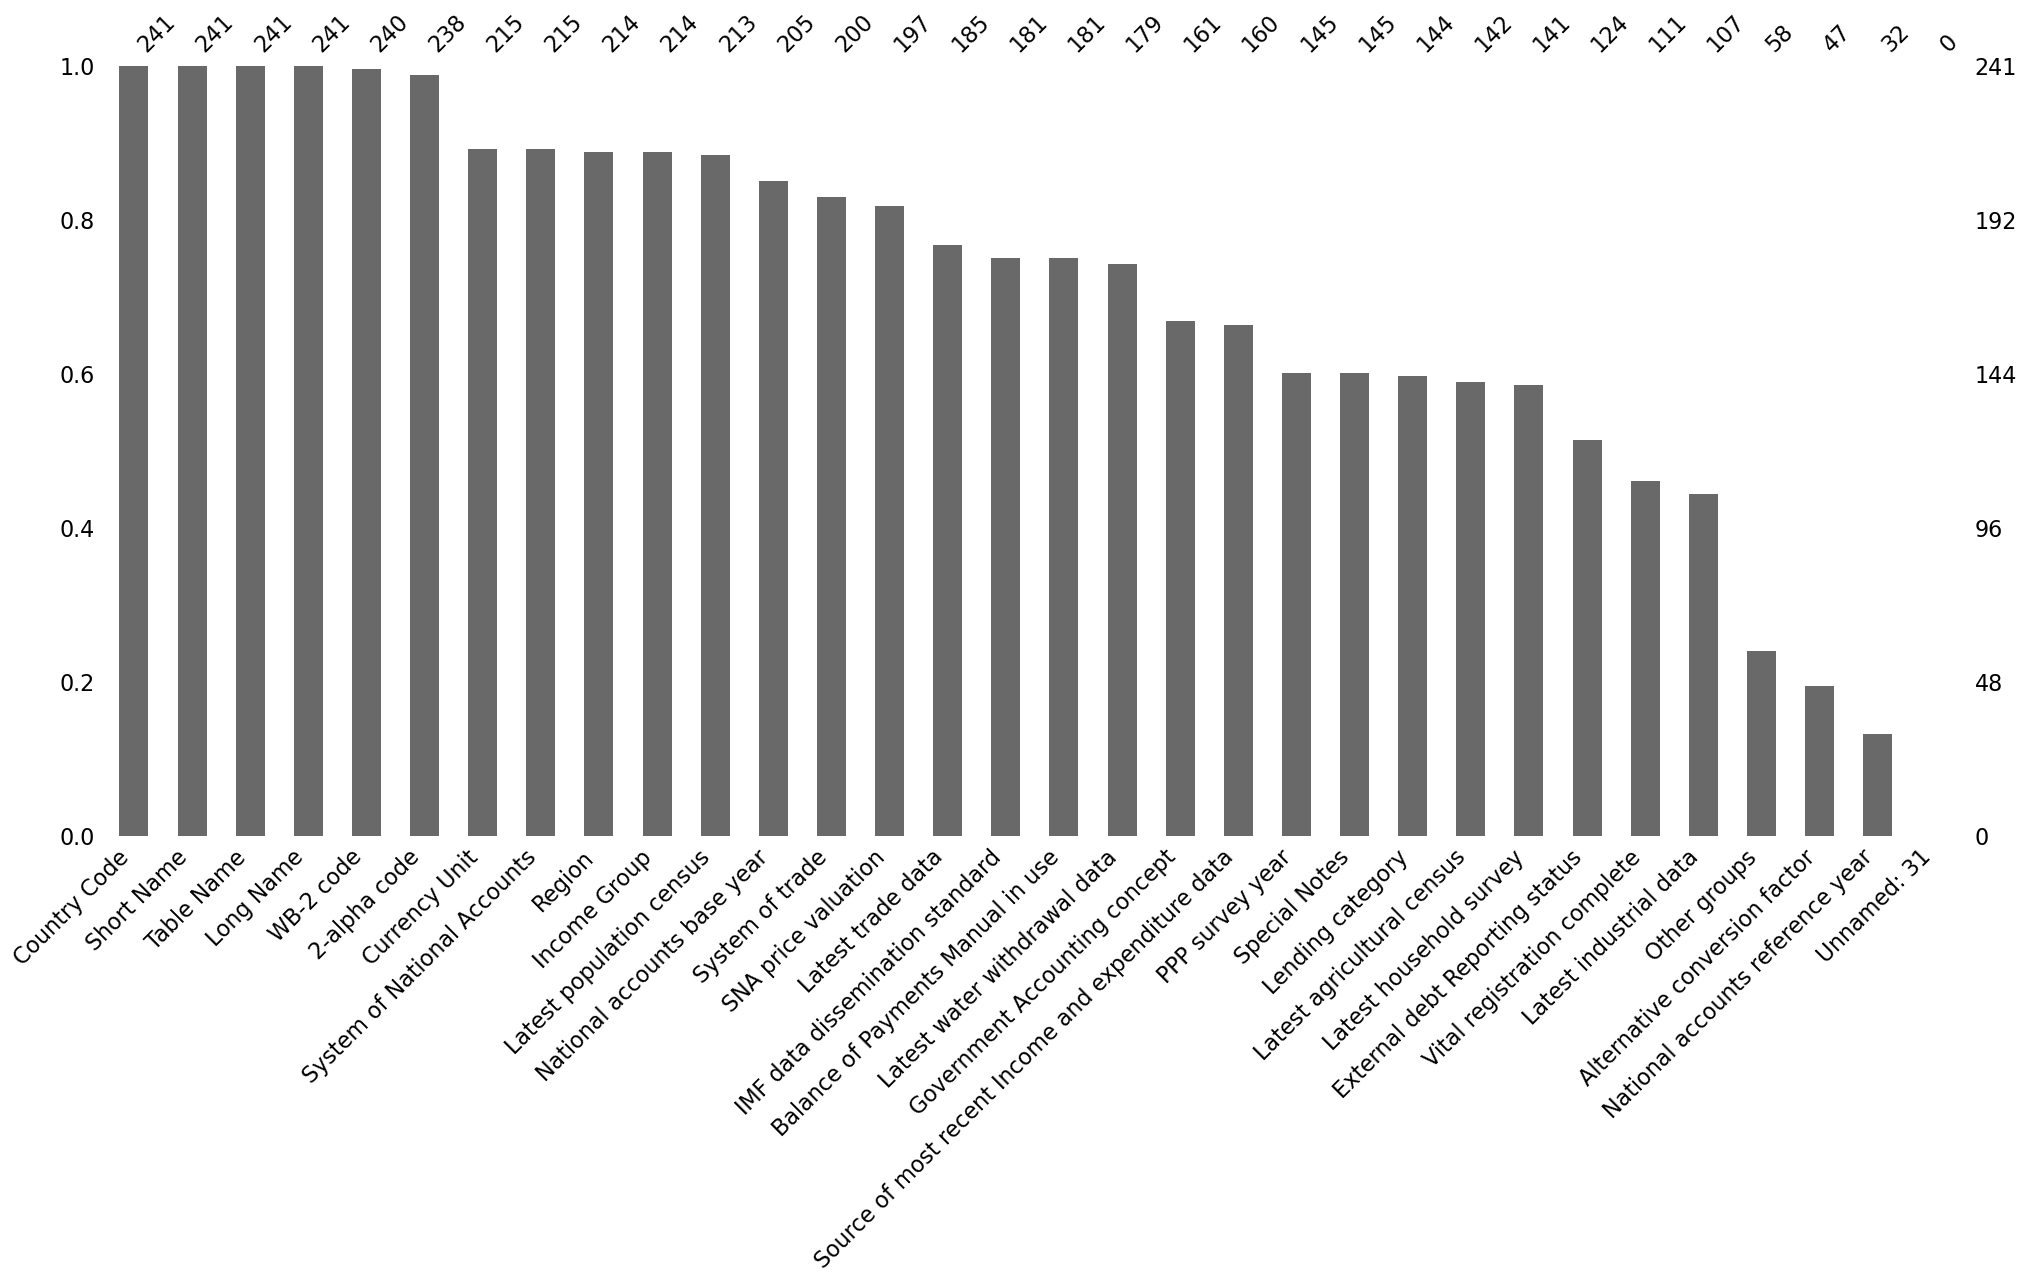

In [14]:
msno.bar(country, sort="descending") # Les 3/4 des colonnes ont un taux de remplissage supérieur à 70%.

In [15]:
indicator.shape # 886'930 lignes et 70 colonnes

(886930, 70)

In [16]:
indicator.isnull().sum().sort_values(ascending=False)

Unnamed: 69       886930
2017              886787
2016              870470
1971              851393
1973              851385
                   ...  
2010              644488
Country Code           0
Indicator Code         0
Indicator Name         0
Country Name           0
Length: 70, dtype: int64

In [17]:
indicator.duplicated().sum() # 0 valeur dupliquée

0

In [18]:
indicator.dtypes.nunique() # contient deux types - object (string) et float (nombre décimal)

2

In [19]:
description.shape # 643'638 lignes et 5 colonnes

(643638, 5)

In [20]:
description.dtypes.nunique() # contient des objets (string) et un float (nombre décimal)

2

In [21]:
description.isnull().sum().sort_values(ascending=False)

Unnamed: 4     643638
CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
dtype: int64

In [22]:
description.duplicated().sum()

0

<Axes: >

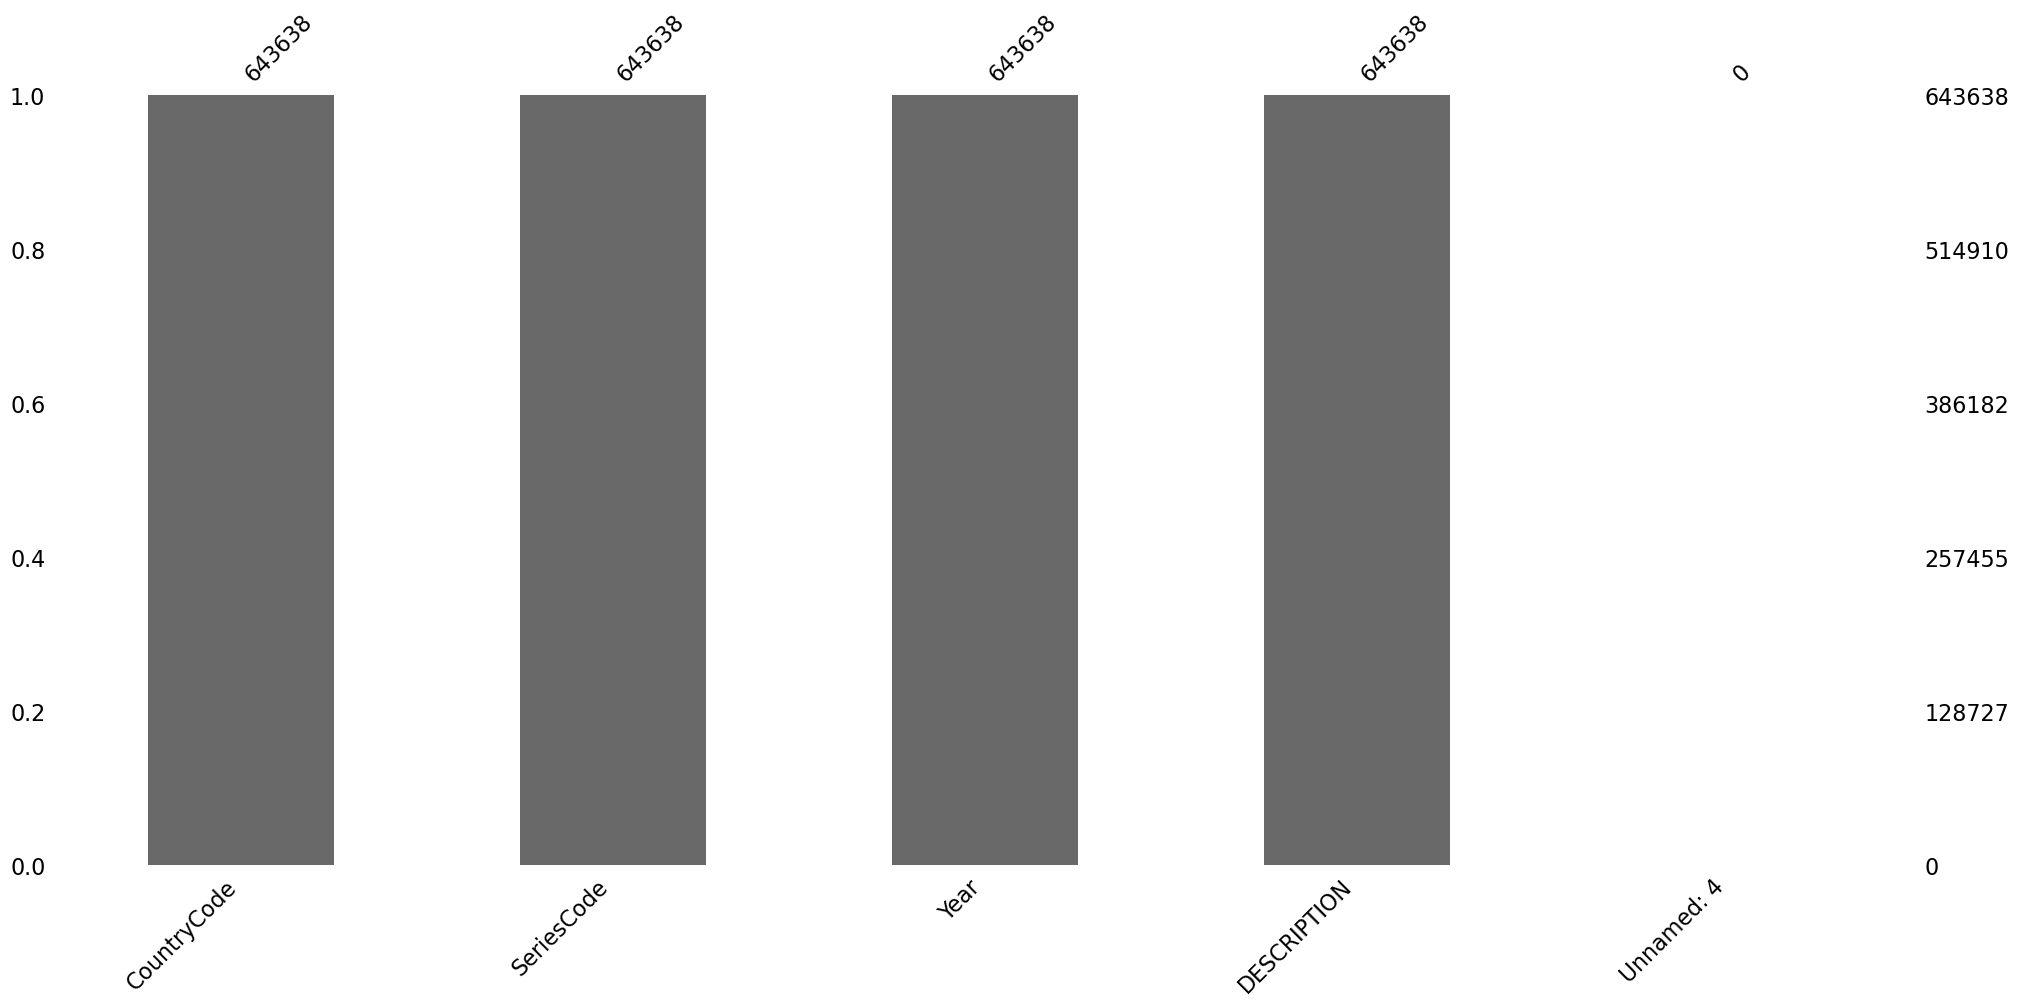

In [23]:
msno.bar(description) # 3 sur 4 colonnes ont un taux de remplissage de 100 % et la dernière a un taux de remplissage de 0 %

In [24]:
topic.shape # 3665 lignes et 21 colonnes

(3665, 21)

In [25]:
topic.dtypes.nunique() # contient les objets (string) et les float (nombre décimal)

2

In [26]:
topic.isnull().sum().sort_values(ascending=False)

Unnamed: 20                            3665
Notes from original source             3665
License Type                           3665
Related indicators                     3665
Other web links                        3665
Unit of measure                        3665
Development relevance                  3662
General comments                       3651
Limitations and exceptions             3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Topic                                     0
Source                                    0
Long definition                           0
Indicator Name                            0
Series Code                               0
dtype: int64

In [27]:
topic.duplicated().sum()

0

In [28]:
topic.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

<Axes: >

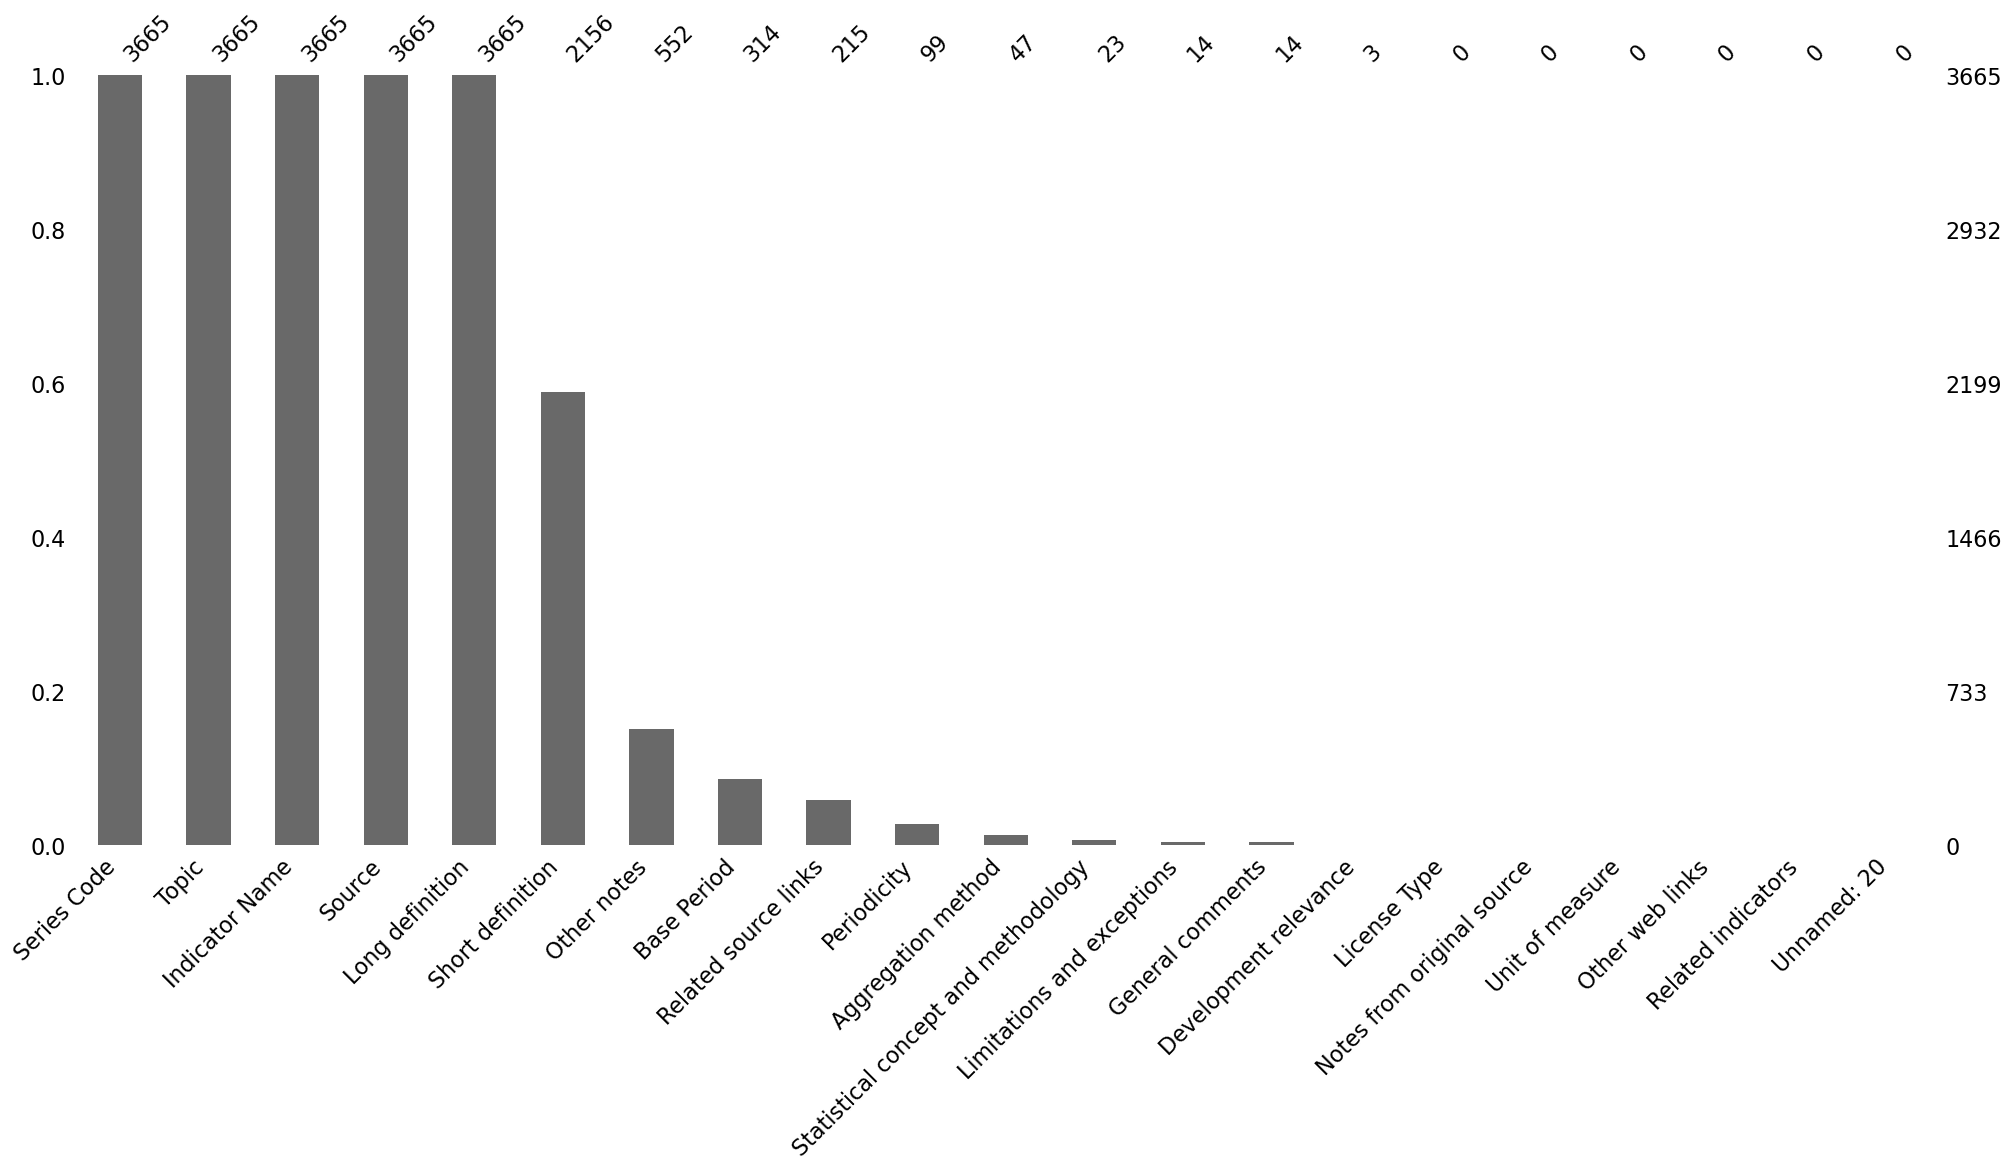

In [29]:
msno.bar(topic, sort="descending") # 6 colonnes ont un taux de remplissage de 50 % et plus

### Nettoyer et fusionner les données

#### Pays

In [30]:
# Renommer les colonnes CountryCode et SeriesCode
country_series.rename(columns={"CountryCode":"Country Code", "SeriesCode":"Indicator Code"}, inplace=True)

In [31]:
country_series

,Country Code,Indicator Code,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [32]:
country_series[country_series["Indicator Code"]=="PRJ.POP.ALL.3.MF"]

,Country Code,Indicator Code,DESCRIPTION,Unnamed: 3


In [33]:
country_series["Indicator Code"].nunique() # 21 indicateurs 

21

In [34]:
# Fusionner les dataframe country_series et country
country = pd.merge(country_series, country, on='Country Code')

In [35]:
country

,Country Code,Indicator Code,DESCRIPTION,Unnamed: 3,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,...,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [36]:
country["Region"]

0      Latin America & Caribbean
1      Latin America & Caribbean
2                     South Asia
3                     South Asia
4                     South Asia
                 ...            
608           Sub-Saharan Africa
609           Sub-Saharan Africa
610           Sub-Saharan Africa
611           Sub-Saharan Africa
612           Sub-Saharan Africa
Name: Region, Length: 613, dtype: object

In [37]:
# sélectionner les colonnes à supprimer via l'index
col_a_supp=country.iloc[:,12:]

In [38]:
# supprimer la sélection de colonnes
country.drop(col_a_supp, axis=1, inplace=True)

In [39]:
# Supprimer d'autres colonnes
country.drop(columns={"DESCRIPTION","Unnamed: 3","Special Notes","Long Name","Table Name","2-alpha code"}, inplace=True)
country.rename(columns={"Short Name":"Country Name"},inplace=True)

In [40]:
country

,Country Code,Indicator Code,Country Name,Currency Unit,Region,Income Group
0,ABW,SP.POP.TOTL,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD
1,ABW,SP.POP.GROW,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD
2,AFG,SP.POP.GROW,Afghanistan,Afghan afghani,South Asia,Low income
3,AFG,NY.GDP.PCAP.PP.CD,Afghanistan,Afghan afghani,South Asia,Low income
4,AFG,SP.POP.TOTL,Afghanistan,Afghan afghani,South Asia,Low income
...,...,...,...,...,...,...
608,ZAF,SP.POP.GROW,South Africa,South African rand,Sub-Saharan Africa,Upper middle income
609,ZMB,SP.POP.GROW,Zambia,New Zambian kwacha,Sub-Saharan Africa,Lower middle income
610,ZMB,SP.POP.TOTL,Zambia,New Zambian kwacha,Sub-Saharan Africa,Lower middle income
611,ZWE,SP.POP.TOTL,Zimbabwe,U.S. dollar,Sub-Saharan Africa,Low income


#### Description

In [41]:
description.rename(columns={"CountryCode":"Country Code", "SeriesCode":"Indicator Code"}, inplace=True)
description.drop(columns={"Unnamed: 4"},inplace=True)

In [42]:
description["Year"]= description["Year"].str.replace("YR","")
description["Year"]= description["Year"].str.replace("yr","")

In [43]:
description["Year"].unique()

array(['2001', '2005', '2000', '2004', '2006', '2003', '1999', '2008',
       '2002', '2007', '2017', '2010', '2009', '2011', '2012', '2015',
       '2014', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '2013', '2016',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050'],
      dtype=object)

In [44]:
del description

#### Indicator

In [45]:
col_a_supp1=indicator.iloc[:,51:]
indicator.drop(col_a_supp1, axis=1, inplace=True)

In [46]:
country.head(1)

,Country Code,Indicator Code,Country Name,Currency Unit,Region,Income Group
0,ABW,SP.POP.TOTL,Aruba,Aruban florin,Latin America & Caribbean,High income: nonOECD


In [47]:
indicator=pd.merge(indicator, country, how='outer')

In [48]:
indicator

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group
0,Afghanistan,AFG,Barro-Lee: Percentage of female population age...,BAR.NOED.1519.FE.ZS,91.44,NaN,NaN,NaN,NaN,88.81,...,59.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Barro-Lee: Percentage of population age 15-19 ...,BAR.NOED.1519.ZS,77.08,NaN,NaN,NaN,NaN,72.24,...,37.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Barro-Lee: Percentage of female population age...,BAR.NOED.15UP.FE.ZS,97.21,NaN,NaN,NaN,NaN,96.14,...,78.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Barro-Lee: Percentage of population age 15+ wi...,BAR.NOED.15UP.ZS,88.81,NaN,NaN,NaN,NaN,85.74,...,58.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Barro-Lee: Percentage of female population age...,BAR.NOED.2024.FE.ZS,94.80,NaN,NaN,NaN,NaN,94.80,...,77.560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886962,Zimbabwe,ZWE,Government expenditure per upper secondary stu...,UIS.XUNIT.USCONST.3.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886963,Zimbabwe,ZWE,Government expenditure per post-secondary non-...,UIS.XUNIT.USCONST.4.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886964,Zimbabwe,ZWE,Government expenditure per tertiary student (c...,UIS.XUNIT.USCONST.56.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,496.566223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886965,Zimbabwe,ZWE,Government expenditure in secondary institutio...,XGDP.23.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,0.505270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
def calculate_missing_proportion(row):
  missing_count = row.isnull().sum() # le nombre de valeurs manquantes par ligne
  total_count = len(row) # compte le nombre total de valeurs par ligne
  proportion_missing = missing_count/total_count
  return proportion_missing
indicator["proportion_missing_values"]=round(indicator.apply(calculate_missing_proportion, axis=1)*100,2)

In [50]:
indicator=indicator.sort_values(by="proportion_missing_values",ascending=True)

#### Topic

In [51]:
# Renommer la colonne Series Code
topic.rename(columns={"Series Code":"Indicator Code"}, inplace=True)

In [52]:
topic_col_a_supp1=topic.iloc[:,3:]

In [53]:
topic_col_a_supp1
# Suppression de la sélection de colonnes
topic.drop(topic_col_a_supp1,axis=1, inplace=True)

In [54]:
topic

,Indicator Code,Topic,Indicator Name
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...


In [55]:
indicator=pd.merge(indicator, topic, on=["Indicator Code","Indicator Name"], how="outer")

### Choisir les indicateurs pertinents

#### Population

In [56]:
indicator.loc[indicator["Indicator Name"]=="Population growth (annual %)",:]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,proportion_missing_values,Topic
627003,Indonesia,IDN,Population growth (annual %),SP.POP.GROW,2.678203,2.652897,2.625890,2.595141,2.560995,2.524548,...,1.284199,1.257327,1.222049,1.181014,1.137494,Indonesian rupiah,East Asia & Pacific,Lower middle income,0.00,Health: Population: Dynamics
627004,Moldova,MDA,Population growth (annual %),SP.POP.GROW,1.389371,1.435119,1.382881,1.364018,1.283474,1.113528,...,-0.013119,-0.026777,-0.060970,-0.064384,-0.059329,Moldovan leu,Europe & Central Asia,Lower middle income,0.00,Health: Population: Dynamics
627005,Angola,AGO,Population growth (annual %),SP.POP.GROW,1.993491,2.202247,2.390126,2.548369,2.662495,2.746673,...,3.559496,3.531824,3.485413,3.428021,3.367572,Angolan kwanza,Sub-Saharan Africa,Upper middle income,0.00,Health: Population: Dynamics
627006,Sri Lanka,LKA,Population growth (annual %),SP.POP.GROW,2.115883,1.396626,1.338519,1.772549,1.463533,1.583304,...,0.756835,0.780301,0.899513,0.934429,1.124060,Sri Lankan rupee,South Asia,Lower middle income,0.00,Health: Population: Dynamics
627007,Nepal,NPL,Population growth (annual %),SP.POP.GROW,1.990486,2.028302,2.066589,2.102072,2.134886,2.165052,...,1.174241,1.205671,1.200297,1.168998,1.132886,Nepalese rupee,South Asia,Low income,0.00,Health: Population: Dynamics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627240,West Bank and Gaza,PSE,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,3.006264,2.984616,2.957995,2.924691,2.884693,Israeli new shekel,Middle East & North Africa,Lower middle income,38.89,Health: Population: Dynamics
627241,Sint Maarten (Dutch part),SXM,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,1.552098,1.525856,NaN,NaN,NaN,NaN,NaN,NaN,64.81,Health: Population: Dynamics
627242,Curacao,CUW,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,0.954188,0.945169,NaN,NaN,NaN,NaN,NaN,NaN,64.81,Health: Population: Dynamics
627243,British Virgin Islands,VGB,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Health: Population: Dynamics


In [57]:
population=indicator[(indicator["Indicator Name"]=="Population, total") | (indicator["Indicator Name"]=="Population growth (annual %)")].sort_values(by="proportion_missing_values", ascending=True)

In [58]:
population

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,proportion_missing_values,Topic
627003,Indonesia,IDN,Population growth (annual %),SP.POP.GROW,2.678203e+00,2.652897e+00,2.625890e+00,2.595141e+00,2.560995e+00,2.524548e+00,...,1.284199e+00,1.257327e+00,1.222049e+00,1.181014e+00,1.137494e+00,Indonesian rupiah,East Asia & Pacific,Lower middle income,0.00,Health: Population: Dynamics
627316,St. Vincent and the Grenadines,VCT,"Population, total",SP.POP.TOTL,9.045200e+04,9.144000e+04,9.246300e+04,9.351700e+04,9.456800e+04,9.561100e+04,...,1.093280e+05,1.093200e+05,1.093570e+05,1.094550e+05,1.096430e+05,East Caribbean dollar,Latin America & Caribbean,Upper middle income,0.00,Health: Population: Structure
627315,Barbados,BRB,"Population, total",SP.POP.TOTL,2.388480e+05,2.400350e+05,2.414410e+05,2.429760e+05,2.445390e+05,2.460340e+05,...,2.815850e+05,2.825090e+05,2.833850e+05,2.842170e+05,2.849960e+05,Barbados dollar,Latin America & Caribbean,High income: nonOECD,0.00,Health: Population: Structure
627314,Mozambique,MOZ,"Population, total",SP.POP.TOTL,9.161534e+06,9.375144e+06,9.595762e+06,9.827580e+06,1.007617e+07,1.034449e+07,...,2.567661e+07,2.643437e+07,2.721238e+07,2.801069e+07,2.882948e+07,New Mozambican metical,Sub-Saharan Africa,Low income,0.00,Health: Population: Structure
627313,Chad,TCD,"Population, total",SP.POP.TOTL,3.643549e+06,3.726091e+06,3.815103e+06,3.907632e+06,3.999512e+06,4.087948e+06,...,1.270514e+07,1.313359e+07,1.356944e+07,1.400941e+07,1.445254e+07,CFA franc,Sub-Saharan Africa,Low income,0.00,Health: Population: Structure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627242,Curacao,CUW,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,9.541881e-01,9.451693e-01,NaN,NaN,NaN,NaN,NaN,NaN,64.81,Health: Population: Dynamics
627244,Nauru,NRU,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Health: Population: Dynamics
627243,British Virgin Islands,VGB,Population growth (annual %),SP.POP.GROW,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Health: Population: Dynamics
627503,British Virgin Islands,VGB,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Health: Population: Structure


In [59]:
pop_a_supp=population.loc[:, "1970":"1985"]
population.drop(pop_a_supp, axis=1, inplace=True)

In [60]:
pop_annee = range(1986, 2017)

In [61]:
pop_annee=[str(annee) for annee in range(1986, 2017)]

In [62]:
population.sort_values(by=pop_annee, ascending=False, inplace=True)
population.reset_index(drop=True, inplace=True)

In [63]:
population = population.loc[population["Currency Unit"].notna(), :]

In [64]:
population.describe().T

,count,mean,std,min,25%,50%,75%,max
1986,382.0,1.181879e+07,7.107969e+07,-1.556722,2.006412,4377.953298,4142140.50,1.066790e+09
1987,382.0,1.202905e+07,7.235813e+07,-1.410886,1.971488,4414.042513,4176328.75,1.084035e+09
1988,382.0,1.224177e+07,7.365432e+07,-1.335095,1.947437,4445.295395,4219913.50,1.101630e+09
1989,382.0,1.245521e+07,7.493325e+07,-1.562425,1.960085,4476.976745,4323560.50,1.118650e+09
1990,385.0,1.259364e+07,7.590669e+07,-1.803750,1.855906,9003.000000,4436661.00,1.135185e+09
1991,385.0,1.280285e+07,7.713828e+07,-5.814339,1.865111,9053.000000,4463600.00,1.150780e+09
1992,384.0,1.303872e+07,7.842004e+07,-5.089333,1.680222,4558.162724,4520430.00,1.164970e+09
1993,384.0,1.324459e+07,7.957744e+07,-6.184857,1.691111,4581.832717,4642792.25,1.178440e+09
1994,384.0,1.344775e+07,8.073458e+07,-4.792691,1.609193,4598.447784,4747936.50,1.191835e+09
1995,385.0,1.361751e+07,8.177808e+07,-2.697722,1.589426,9230.000000,4760850.00,1.204855e+09


In [65]:
population.drop(columns={"proportion_missing_values", "Topic"}, inplace=True)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/956691064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population.drop(columns={"proportion_missing_values", "Topic"}, inplace=True)


In [66]:
population=population.round(2)

In [67]:
population=population.loc[population["Income Group"]=="High income: OECD",:]
population.reset_index(drop=True, inplace=True)

In [68]:
pop_total= population.loc[population["Indicator Code"]=="SP.POP.TOTL",:]

In [69]:
pop_total.reset_index(drop=True, inplace=True)

In [70]:
top5_pop_total=pop_total.head()
top5_pop_total["Total Population Score"] = range(5,0,-1)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/1778442329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_pop_total["Total Population Score"] = range(5,0,-1)


In [71]:
top5_pop_total

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,Total Population Score
0,United States,USA,"Population, total",SP.POP.TOTL,240133000.0,242289000.0,244499000.0,246819000.0,249623000.0,252981000.0,...,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0,U.S. dollar,North America,High income: OECD,5
1,Japan,JPN,"Population, total",SP.POP.TOTL,121492000.0,122091000.0,122613000.0,123116000.0,123537000.0,123921000.0,...,127833000.0,127629000.0,127445000.0,127276000.0,127141000.0,126994511.0,Japanese yen,East Asia & Pacific,High income: OECD,4
2,Germany,DEU,"Population, total",SP.POP.TOTL,77720436.0,77839920.0,78144619.0,78751283.0,79433029.0,80013896.0,...,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82667685.0,Euro,Europe & Central Asia,High income: OECD,3
3,France,FRA,"Population, total",SP.POP.TOTL,57132691.0,57482591.0,57836486.0,58182702.0,58512808.0,58559312.0,...,65342776.0,65659790.0,65998570.0,66331957.0,66624068.0,66896109.0,Euro,Europe & Central Asia,High income: OECD,2
4,United Kingdom,GBR,"Population, total",SP.POP.TOTL,56681396.0,56802050.0,56928327.0,57076711.0,57247586.0,57424897.0,...,63258918.0,63700300.0,64128226.0,64613160.0,65128861.0,65637239.0,Pound sterling,Europe & Central Asia,High income: OECD,1


In [72]:
top5_pop_total # evolution de la population totale des 5 pays les plus peuplés entre 1986 et 2016

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,Total Population Score
0,United States,USA,"Population, total",SP.POP.TOTL,240133000.0,242289000.0,244499000.0,246819000.0,249623000.0,252981000.0,...,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0,U.S. dollar,North America,High income: OECD,5
1,Japan,JPN,"Population, total",SP.POP.TOTL,121492000.0,122091000.0,122613000.0,123116000.0,123537000.0,123921000.0,...,127833000.0,127629000.0,127445000.0,127276000.0,127141000.0,126994511.0,Japanese yen,East Asia & Pacific,High income: OECD,4
2,Germany,DEU,"Population, total",SP.POP.TOTL,77720436.0,77839920.0,78144619.0,78751283.0,79433029.0,80013896.0,...,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82667685.0,Euro,Europe & Central Asia,High income: OECD,3
3,France,FRA,"Population, total",SP.POP.TOTL,57132691.0,57482591.0,57836486.0,58182702.0,58512808.0,58559312.0,...,65342776.0,65659790.0,65998570.0,66331957.0,66624068.0,66896109.0,Euro,Europe & Central Asia,High income: OECD,2
4,United Kingdom,GBR,"Population, total",SP.POP.TOTL,56681396.0,56802050.0,56928327.0,57076711.0,57247586.0,57424897.0,...,63258918.0,63700300.0,64128226.0,64613160.0,65128861.0,65637239.0,Pound sterling,Europe & Central Asia,High income: OECD,1


In [73]:
pop_growth_evolution= population.loc[population["Indicator Code"]=="SP.POP.GROW",:]

In [74]:
pop_growth_evolution.reset_index(drop=True, inplace=True)

In [75]:
pop_growth_evolution=pop_growth_evolution.head()

In [76]:
pop_growth_evolution

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group
0,Chile,CHL,Population growth (annual %),SP.POP.GROW,1.65,1.68,1.69,1.68,1.65,1.61,...,0.97,0.94,0.91,0.88,0.86,0.84,0.82,Chilean peso,Latin America & Caribbean,High income: OECD
1,Australia,AUS,Population growth (annual %),SP.POP.GROW,1.64,1.52,1.64,1.69,1.48,1.27,...,1.56,1.39,1.72,1.70,1.47,1.39,1.41,Australian dollar,East Asia & Pacific,High income: OECD
2,Israel,ISR,Population growth (annual %),SP.POP.GROW,1.55,1.62,1.66,1.70,3.09,6.02,...,1.83,1.85,1.85,1.87,1.92,1.98,1.97,Israeli new shekel,Middle East & North Africa,High income: OECD
3,Slovenia,SVN,Population growth (annual %),SP.POP.GROW,1.24,1.20,0.27,0.06,0.09,0.06,...,0.44,0.21,0.21,0.14,0.10,0.08,0.06,Euro,Europe & Central Asia,High income: OECD
4,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.00,1.31,1.29,1.78,1.49,1.36,...,1.11,0.99,1.18,1.16,1.10,0.85,1.21,Canadian dollar,North America,High income: OECD


In [77]:
pop_growth_evolution.sort_values(by="2016",ascending=False, inplace=True)

In [78]:
pop_growth_evolution

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group
2,Israel,ISR,Population growth (annual %),SP.POP.GROW,1.55,1.62,1.66,1.70,3.09,6.02,...,1.83,1.85,1.85,1.87,1.92,1.98,1.97,Israeli new shekel,Middle East & North Africa,High income: OECD
1,Australia,AUS,Population growth (annual %),SP.POP.GROW,1.64,1.52,1.64,1.69,1.48,1.27,...,1.56,1.39,1.72,1.70,1.47,1.39,1.41,Australian dollar,East Asia & Pacific,High income: OECD
4,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.00,1.31,1.29,1.78,1.49,1.36,...,1.11,0.99,1.18,1.16,1.10,0.85,1.21,Canadian dollar,North America,High income: OECD
0,Chile,CHL,Population growth (annual %),SP.POP.GROW,1.65,1.68,1.69,1.68,1.65,1.61,...,0.97,0.94,0.91,0.88,0.86,0.84,0.82,Chilean peso,Latin America & Caribbean,High income: OECD
3,Slovenia,SVN,Population growth (annual %),SP.POP.GROW,1.24,1.20,0.27,0.06,0.09,0.06,...,0.44,0.21,0.21,0.14,0.10,0.08,0.06,Euro,Europe & Central Asia,High income: OECD


In [79]:
pop_growth_evolution.reset_index(drop=True, inplace=True)

In [80]:
pop_growth_evolution

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group
0,Israel,ISR,Population growth (annual %),SP.POP.GROW,1.55,1.62,1.66,1.70,3.09,6.02,...,1.83,1.85,1.85,1.87,1.92,1.98,1.97,Israeli new shekel,Middle East & North Africa,High income: OECD
1,Australia,AUS,Population growth (annual %),SP.POP.GROW,1.64,1.52,1.64,1.69,1.48,1.27,...,1.56,1.39,1.72,1.70,1.47,1.39,1.41,Australian dollar,East Asia & Pacific,High income: OECD
2,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.00,1.31,1.29,1.78,1.49,1.36,...,1.11,0.99,1.18,1.16,1.10,0.85,1.21,Canadian dollar,North America,High income: OECD
3,Chile,CHL,Population growth (annual %),SP.POP.GROW,1.65,1.68,1.69,1.68,1.65,1.61,...,0.97,0.94,0.91,0.88,0.86,0.84,0.82,Chilean peso,Latin America & Caribbean,High income: OECD
4,Slovenia,SVN,Population growth (annual %),SP.POP.GROW,1.24,1.20,0.27,0.06,0.09,0.06,...,0.44,0.21,0.21,0.14,0.10,0.08,0.06,Euro,Europe & Central Asia,High income: OECD


In [81]:
top5_pop_growth=pop_growth_evolution.loc[:4,:]

In [82]:
top5_pop_growth

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group
0,Israel,ISR,Population growth (annual %),SP.POP.GROW,1.55,1.62,1.66,1.70,3.09,6.02,...,1.83,1.85,1.85,1.87,1.92,1.98,1.97,Israeli new shekel,Middle East & North Africa,High income: OECD
1,Australia,AUS,Population growth (annual %),SP.POP.GROW,1.64,1.52,1.64,1.69,1.48,1.27,...,1.56,1.39,1.72,1.70,1.47,1.39,1.41,Australian dollar,East Asia & Pacific,High income: OECD
2,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.00,1.31,1.29,1.78,1.49,1.36,...,1.11,0.99,1.18,1.16,1.10,0.85,1.21,Canadian dollar,North America,High income: OECD
3,Chile,CHL,Population growth (annual %),SP.POP.GROW,1.65,1.68,1.69,1.68,1.65,1.61,...,0.97,0.94,0.91,0.88,0.86,0.84,0.82,Chilean peso,Latin America & Caribbean,High income: OECD
4,Slovenia,SVN,Population growth (annual %),SP.POP.GROW,1.24,1.20,0.27,0.06,0.09,0.06,...,0.44,0.21,0.21,0.14,0.10,0.08,0.06,Euro,Europe & Central Asia,High income: OECD


In [83]:
top5_pop_growth["Population Growth Score"] = range(5,0,-1)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/2581414338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_pop_growth["Population Growth Score"] = range(5,0,-1)


In [84]:
top5_pop_growth = top5_pop_growth.loc[top5_pop_growth["Indicator Name"]=="Population growth (annual %)",["Country Name","Region", "Indicator Name","Income Group","2016","Population Growth Score"]]

In [85]:
top5_pop_growth

,Country Name,Region,Indicator Name,Income Group,2016,Population Growth Score
0,Israel,Middle East & North Africa,Population growth (annual %),High income: OECD,1.97,5
1,Australia,East Asia & Pacific,Population growth (annual %),High income: OECD,1.41,4
2,Canada,North America,Population growth (annual %),High income: OECD,1.21,3
3,Chile,Latin America & Caribbean,Population growth (annual %),High income: OECD,0.82,2
4,Slovenia,Europe & Central Asia,Population growth (annual %),High income: OECD,0.06,1


#### Technology 

In [86]:
indicator.loc[indicator["Indicator Name"]=="Internet users (per 100 people)",:].head(1) # IT.NET.USER.P2

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,proportion_missing_values,Topic
147862,Grenada,GRD,Internet users (per 100 people),IT.NET.USER.P2,0.0,NaN,NaN,NaN,NaN,0.0,...,32.0,35.0,51.6,53.81,55.856408,NaN,NaN,NaN,12.96,Infrastructure: Communications


In [87]:
internet = indicator.loc[indicator["Indicator Name"]=="Internet users (per 100 people)",:]

In [88]:
internet_a_supp=internet.iloc[:,4:44]
internet.drop(internet_a_supp, axis=1,inplace=True)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/3261403289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet.drop(internet_a_supp, axis=1,inplace=True)


In [89]:
internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,proportion_missing_values,Topic
147862,Grenada,GRD,Internet users (per 100 people),IT.NET.USER.P2,27.0,30.000000,32.0000,35.000000,51.60,53.810000,55.856408,NaN,NaN,NaN,12.96,Infrastructure: Communications
147863,Thailand,THA,Internet users (per 100 people),IT.NET.USER.P2,22.4,23.669926,26.4600,28.940000,34.89,39.316127,47.504966,NaN,NaN,NaN,12.96,Infrastructure: Communications
147864,Syrian Arab Republic,SYR,Internet users (per 100 people),IT.NET.USER.P2,20.7,22.500000,24.3001,26.200000,28.09,29.979797,31.869627,NaN,NaN,NaN,12.96,Infrastructure: Communications
147865,Burundi,BDI,Internet users (per 100 people),IT.NET.USER.P2,1.0,1.110000,1.2200,1.264218,1.38,4.866224,5.173627,NaN,NaN,NaN,12.96,Infrastructure: Communications
147866,Togo,TGO,Internet users (per 100 people),IT.NET.USER.P2,3.0,3.500000,4.0000,4.500000,5.70,7.120000,11.310000,NaN,NaN,NaN,12.96,Infrastructure: Communications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148099,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications
148100,Kosovo,XKX,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications
148101,Channel Islands,CHI,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications
148102,Nauru,NRU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications


In [90]:
internet.sort_values(by="2016",ascending=False, inplace=True)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/681026930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet.sort_values(by="2016",ascending=False, inplace=True)


In [91]:
internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,proportion_missing_values,Topic
147898,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,93.39,94.819687,96.209800,96.54680,98.160000,98.200000,98.240016,NaN,NaN,NaN,42.59,Infrastructure: Communications
148079,Liechtenstein,LIE,Internet users (per 100 people),IT.NET.USER.P2,80.00,85.000000,89.407700,93.80000,95.210000,96.641195,98.093904,NaN,NaN,NaN,59.26,Infrastructure: Communications
147979,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,84.21,88.336000,91.299305,95.30000,96.800000,98.323610,98.000000,NaN,NaN,NaN,50.00,Infrastructure: Communications
147973,Bahrain,BHR,Internet users (per 100 people),IT.NET.USER.P2,55.00,76.999966,88.000000,90.00004,90.503133,93.478301,97.999981,NaN,NaN,NaN,50.00,Infrastructure: Communications
148053,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,81.00,81.000000,86.434425,94.00000,95.900000,96.910000,97.930637,NaN,NaN,NaN,53.70,Infrastructure: Communications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148099,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications
148100,Kosovo,XKX,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications
148101,Channel Islands,CHI,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications
148102,Nauru,NRU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.59,Infrastructure: Communications


In [92]:
internet.drop(columns={"Currency Unit","Region","Income Group","proportion_missing_values","Topic"}, inplace=True)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/2504695938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet.drop(columns={"Currency Unit","Region","Income Group","proportion_missing_values","Topic"}, inplace=True)


In [93]:
internet.dropna()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
147898,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,93.39,94.819687,96.209800,96.54680,98.160000,98.200000,98.240016
148079,Liechtenstein,LIE,Internet users (per 100 people),IT.NET.USER.P2,80.00,85.000000,89.407700,93.80000,95.210000,96.641195,98.093904
147979,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,84.21,88.336000,91.299305,95.30000,96.800000,98.323610,98.000000
147973,Bahrain,BHR,Internet users (per 100 people),IT.NET.USER.P2,55.00,76.999966,88.000000,90.00004,90.503133,93.478301,97.999981
148053,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,81.00,81.000000,86.434425,94.00000,95.900000,96.910000,97.930637
...,...,...,...,...,...,...,...,...,...,...,...
148027,Madagascar,MDG,Internet users (per 100 people),IT.NET.USER.P2,1.70,1.900000,2.300000,3.00000,3.700000,4.173972,4.713663
148009,Niger,NER,Internet users (per 100 people),IT.NET.USER.P2,0.83,1.300000,1.407700,1.70000,1.950000,2.476220,4.322758
148035,Central African Republic,CAF,Internet users (per 100 people),IT.NET.USER.P2,2.00,2.200000,3.000000,3.40000,3.600000,3.800000,4.000000
148061,Guinea-Bissau,GNB,Internet users (per 100 people),IT.NET.USER.P2,2.45,2.672000,2.893991,3.10000,3.320000,3.540707,3.761414


In [94]:
internet["2016"].min()

1.17711872

In [95]:
internet["2016"].max()

98.2400163

In [96]:
top5_internet=internet.head(5)

In [97]:
top5_internet.reset_index(drop=True, inplace=True)

In [98]:
top5_internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
0,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,93.39,94.819687,96.209800,96.54680,98.160000,98.200000,98.240016
1,Liechtenstein,LIE,Internet users (per 100 people),IT.NET.USER.P2,80.00,85.000000,89.407700,93.80000,95.210000,96.641195,98.093904
2,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,84.21,88.336000,91.299305,95.30000,96.800000,98.323610,98.000000
3,Bahrain,BHR,Internet users (per 100 people),IT.NET.USER.P2,55.00,76.999966,88.000000,90.00004,90.503133,93.478301,97.999981
4,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,81.00,81.000000,86.434425,94.00000,95.900000,96.910000,97.930637


In [99]:
top5_internet["Internet Score"]= range(5,0,-1)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/344271491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_internet["Internet Score"]= range(5,0,-1)


In [100]:
top5_internet

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,Internet Score
0,Iceland,ISL,Internet users (per 100 people),IT.NET.USER.P2,93.39,94.819687,96.209800,96.54680,98.160000,98.200000,98.240016,5
1,Liechtenstein,LIE,Internet users (per 100 people),IT.NET.USER.P2,80.00,85.000000,89.407700,93.80000,95.210000,96.641195,98.093904,4
2,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,84.21,88.336000,91.299305,95.30000,96.800000,98.323610,98.000000,3
3,Bahrain,BHR,Internet users (per 100 people),IT.NET.USER.P2,55.00,76.999966,88.000000,90.00004,90.503133,93.478301,97.999981,2
4,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,81.00,81.000000,86.434425,94.00000,95.900000,96.910000,97.930637,1


In [101]:
top5_internet=top5_internet[["Country Name","Indicator Name","2016","Internet Score"]]

In [102]:
top5_internet

,Country Name,Indicator Name,2016,Internet Score
0,Iceland,Internet users (per 100 people),98.240016,5
1,Liechtenstein,Internet users (per 100 people),98.093904,4
2,Bermuda,Internet users (per 100 people),98.000000,3
3,Bahrain,Internet users (per 100 people),97.999981,2
4,Andorra,Internet users (per 100 people),97.930637,1


#### Education

In [103]:
education=indicator[(indicator["Indicator Code"]=="PRJ.POP.ALL.3.MF") | (indicator["Indicator Code"]=="PRJ.POP.ALL.4.MF") |(indicator["Indicator Code"]=="SP.POP.TOTL")]
education.dropna(subset=["Indicator Name"], inplace=True)
education=education.loc[:,["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2010","2015"]] # je choisis les années 2010 et 2015
education.dropna(subset=["2010","2015"], inplace=True)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/4270309451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education.dropna(subset=["Indicator Name"], inplace=True)


In [104]:
education["Indicator Code"].unique()

array(['PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'SP.POP.TOTL'],
      dtype=object)

In [105]:
pop_2010_2015=pop_total.loc[:, ["Country Name", "Country Code", "Indicator Name", "Indicator Code", "2010","2015"]]

In [106]:
education=pd.merge(education, pop_2010_2015, on=["Country Name", "Country Code","Indicator Code", "Indicator Name","2010","2015"], how="outer")

In [107]:
education

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2015
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,28803167.00,33736494.00
1,Albania,ALB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,883.06,1030.33
2,Albania,ALB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,193.90,218.90
3,Albania,ALB,"Population, total",SP.POP.TOTL,2913021.00,2880703.00
4,Algeria,DZA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,6734.18,8209.79
...,...,...,...,...,...,...
561,Zambia,ZMB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,284.56,353.71
562,Zambia,ZMB,"Population, total",SP.POP.TOTL,13850033.00,16100587.00
563,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,3010.47,3596.51
564,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,304.50,370.12


In [108]:
education_2010=education.pivot(index="Country Name", columns="Indicator Code", values="2010")
education_2010 = education_2010.dropna(subset=['PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'SP.POP.TOTL'])

In [109]:
education_2015 = education.pivot(index="Country Name", columns="Indicator Code", values="2015")
education_2015.dropna(subset=['PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF', 'SP.POP.TOTL'], inplace=True)

In [110]:
def calc_2015(row):
  return(round(row["PRJ.POP.ALL.3.MF"] + row["PRJ.POP.ALL.4.MF"])/row["SP.POP.TOTL"]*100)

In [111]:
def calc_2010(row):
  return(row["PRJ.POP.ALL.3.MF"]/row["SP.POP.TOTL"]*100)

In [112]:
education_2010["proportion students 2010"] = education_2010.apply(calc_2010, axis=1)
education_2010=education_2010.sort_values(by="proportion students 2010", ascending=False)
education_2010["proportion students 2010"]=education_2010["proportion students 2010"]

In [113]:
education_2015["proportion students 2015"] = education_2015.apply(calc_2015, axis=1)
education_2015=education_2015.sort_values(by="proportion students 2015", ascending=False)
education_2015["proportion students 2015"] = education_2015["proportion students 2015"]

In [114]:
education_2010=education_2010.reset_index()
education_2015=education_2015.reset_index()

In [115]:
top5_education_2010=education_2010.loc[:4,:]
top5_education_2010["Education Score 2010"] = range(5,0,-1)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/2925613437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_education_2010["Education Score 2010"] = range(5,0,-1)


In [116]:
top5_education_2015=education_2015.loc[:4,:]
top5_education_2015["Education Score 2015"] = range(5,0,-1)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/662362032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_education_2015["Education Score 2015"] = range(5,0,-1)


In [117]:
top5_education_2010

Indicator Code,Country Name,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,SP.POP.TOTL,proportion students 2010,Education Score 2010
0,Czech Republic,6243.77,1290.06,10474410.0,0.059610,5
1,Slovak Republic,3182.38,575.42,5391428.0,0.059027,4
2,Serbia,4209.94,1040.72,7291436.0,0.057738,3
3,Russian Federation,81611.79,22958.54,142849449.0,0.057131,2
4,Belarus,5355.56,1380.65,9490583.0,0.056430,1


In [118]:
top5_education_2015

Indicator Code,Country Name,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,SP.POP.TOTL,proportion students 2015,Education Score 2015
0,Georgia,1274.14,1845.26,3717100.0,0.083909,5
1,Serbia,4572.07,1123.79,7095383.0,0.080278,4
2,Lithuania,1061.82,1177.63,2904910.0,0.077076,3
3,Czech Republic,6492.83,1406.61,10546059.0,0.074900,2
4,Canada,10693.52,15821.87,35848610.0,0.073964,1


#### Economic

In [119]:
gdp=indicator[indicator["Indicator Name"]=="GDP per capita, PPP (current international $)"]

In [120]:
gdp.isnull().sum().sort_values() # années intéressantes de 1990 à 2016

Country Name                   0
proportion_missing_values      0
Indicator Code                 0
Topic                          0
Indicator Name                 0
Country Code                   0
2011                          25
2010                          27
2009                          27
2008                          27
2005                          28
2002                          28
2003                          28
2004                          28
2006                          28
2007                          28
2012                          29
2013                          29
2001                          29
2000                          31
2014                          35
1999                          35
2015                          36
1998                          36
1997                          36
1996                          37
1995                          38
2016                          39
1994                          46
1993                          47
1992      

In [121]:
gdp_a_supp=gdp.iloc[:, 4:50]
gdp=gdp.drop(gdp_a_supp, axis=1)
gdp.drop(columns={"Currency Unit","Region","Income Group","proportion_missing_values","Topic"}, inplace=True)

In [122]:
gdp=gdp.dropna()

In [123]:
gdp.sort_values(by="2016", ascending=False, inplace=True)

In [124]:
gdp=gdp.round(2)

In [125]:
gdp.reset_index(drop=True, inplace=True)

In [126]:
top5_gdp_2016 = gdp.head()

In [127]:
top5_gdp_2016 ["GDP Score 2016"] = range(5,0,-1)

/var/folders/xn/nm8rkpc55hs0zlf35rlvspbw0000gp/T/ipykernel_74193/1715835609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_gdp_2016 ["GDP Score 2016"] = range(5,0,-1)


In [128]:
top5_gdp_2016

,Country Name,Country Code,Indicator Name,Indicator Code,2016,GDP Score 2016
0,Qatar,QAT,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,127727.97,5
1,"Macao SAR, China",MAC,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,104343.66,4
2,Luxembourg,LUX,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,103556.59,3
3,Singapore,SGP,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,88003.10,2
4,Brunei Darussalam,BRN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,77570.91,1


## 2ème partie

### Score total

In [129]:
# sélection des colonnes top5_internet
col_internet=top5_internet[["Country Name","Internet Score"]]

In [130]:
# sélection des colonnes top5_pop_total
col_pop_total=top5_pop_total[["Country Name","Total Population Score"]]
# sélection des colonnes top5_pop_growth
col_pop_growth=top5_pop_growth[["Country Name","Population Growth Score"]]

In [131]:
# sélection des colonnes top5_edu_secondary
col_edu_2010=top5_education_2010[["Country Name", "Education Score 2010"]]
# # sélection des colonnes top5_edu_tertiary
col_edu_2015=top5_education_2015[["Country Name", "Education Score 2015"]]

In [132]:
# sélection des colonnes top5_gdp_2016
col_gdp_2016=top5_gdp_2016[["Country Name", "GDP Score 2016"]]


In [133]:
# Fusionner merged_gdp et col_internet
merged_internet= pd.merge(col_gdp_2016, col_internet, on="Country Name", how="outer")
# Fusionner merged_internet et col_edu_sec
merged_edu_sec = pd.merge(merged_internet, col_edu_2010, on="Country Name", how="outer")
# Fusionner merged_edu_sec et col_edu_ter
merged_edu_ter = pd.merge(merged_edu_sec, col_edu_2015, on="Country Name", how="outer")
# Fusionner merged_edu_ter et col_pop_total
merged_pop_total = pd.merge(merged_edu_ter, col_pop_total, on="Country Name", how="outer")
# Fusionner merged_pop_total et col_pop_growth
all_scores = pd.merge(merged_pop_total, col_pop_growth, on="Country Name", how="outer")

In [134]:
all_scores.fillna(0,inplace=True)

In [135]:
all_scores

,Country Name,GDP Score 2016,Internet Score,Education Score 2010,Education Score 2015,Total Population Score,Population Growth Score
0,Andorra,0.0,1.0,0.0,0.0,0.0,0.0
1,Australia,0.0,0.0,0.0,0.0,0.0,4.0
2,Bahrain,0.0,2.0,0.0,0.0,0.0,0.0
3,Belarus,0.0,0.0,1.0,0.0,0.0,0.0
4,Bermuda,0.0,3.0,0.0,0.0,0.0,0.0
5,Brunei Darussalam,1.0,0.0,0.0,0.0,0.0,0.0
6,Canada,0.0,0.0,0.0,1.0,0.0,3.0
7,Chile,0.0,0.0,0.0,0.0,0.0,2.0
8,Czech Republic,0.0,0.0,5.0,2.0,0.0,0.0
9,France,0.0,0.0,0.0,0.0,2.0,0.0


In [136]:
def total_score(row):
  return (row["GDP Score 2016"]+ row["Internet Score"]+ row["Education Score 2010"]+ row["Education Score 2015"]+ row["Total Population Score"]+ row["Population Growth Score"])
                       

In [137]:
all_scores["Total Score"]=all_scores.apply(total_score, axis=1)

In [138]:
all_scores

,Country Name,GDP Score 2016,Internet Score,Education Score 2010,Education Score 2015,Total Population Score,Population Growth Score,Total Score
0,Andorra,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Australia,0.0,0.0,0.0,0.0,0.0,4.0,4.0
2,Bahrain,0.0,2.0,0.0,0.0,0.0,0.0,2.0
3,Belarus,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Bermuda,0.0,3.0,0.0,0.0,0.0,0.0,3.0
5,Brunei Darussalam,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Canada,0.0,0.0,0.0,1.0,0.0,3.0,4.0
7,Chile,0.0,0.0,0.0,0.0,0.0,2.0,2.0
8,Czech Republic,0.0,0.0,5.0,2.0,0.0,0.0,7.0
9,France,0.0,0.0,0.0,0.0,2.0,0.0,2.0


In [139]:
# Définir les pondérations
weights = { 
  "GDP Score 2016": 0.7,
  "Internet Score": 0.3,
  "Education Score 2010": 0.3,
  "Education Score 2015": 0.2,
  "Total Population Score": 0.2,
  "Population Growth Score": 0.3
}

In [140]:
# créer un score pondérer
def weighted_score(row):
  return (row["GDP Score 2016"]*weights["GDP Score 2016"]+row["Internet Score"]*weights["Internet Score"]+ row["Education Score 2010"]*weights["Education Score 2010"]+ row["Education Score 2015"]*weights["Education Score 2015"]+ row["Total Population Score"]*weights["Total Population Score"]+ row["Population Growth Score"]*weights["Population Growth Score"])/ sum(weights.values())

In [141]:
all_scores["Score weighted"]= all_scores.apply(weighted_score, axis=1)

In [142]:
all_scores.reset_index(drop=True, inplace=True)

In [143]:
all_scores

,Country Name,GDP Score 2016,Internet Score,Education Score 2010,Education Score 2015,Total Population Score,Population Growth Score,Total Score,Score weighted
0,Andorra,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.15
1,Australia,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.60
2,Bahrain,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.30
3,Belarus,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.15
4,Bermuda,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.45
5,Brunei Darussalam,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.35
6,Canada,0.0,0.0,0.0,1.0,0.0,3.0,4.0,0.55
7,Chile,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.30
8,Czech Republic,0.0,0.0,5.0,2.0,0.0,0.0,7.0,0.95
9,France,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.20


In [144]:
top5_scores = all_scores.sort_values(by=["Total Score", "Score weighted"], ascending=[False, False]).head(5)

In [145]:
top5_scores = top5_scores.reset_index(drop=True)

In [146]:
top5_scores.sort_values(by="Score weighted", ascending=False, inplace=True)

In [147]:
top5_scores

,Country Name,GDP Score 2016,Internet Score,Education Score 2010,Education Score 2015,Total Population Score,Population Growth Score,Total Score,Score weighted
2,Qatar,5.0,0.0,0.0,0.0,0.0,0.0,5.0,1.75
0,Czech Republic,0.0,0.0,5.0,2.0,0.0,0.0,7.0,0.95
1,Serbia,0.0,0.0,3.0,4.0,0.0,0.0,7.0,0.85
3,Iceland,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.75
4,Israel,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.75


### Représentation graphique

#### Education

In [148]:
top5_education_2010

Indicator Code,Country Name,PRJ.POP.ALL.3.MF,PRJ.POP.ALL.4.MF,SP.POP.TOTL,proportion students 2010,Education Score 2010
0,Czech Republic,6243.77,1290.06,10474410.0,0.059610,5
1,Slovak Republic,3182.38,575.42,5391428.0,0.059027,4
2,Serbia,4209.94,1040.72,7291436.0,0.057738,3
3,Russian Federation,81611.79,22958.54,142849449.0,0.057131,2
4,Belarus,5355.56,1380.65,9490583.0,0.056430,1


In [150]:
top5_education_2010_std = top5_education_2010["proportion students 2010"].std()
top5_education_2010_std

0.00131641439914876

In [151]:
top5_education_2010_mean = top5_education_2010[["proportion students 2010"]].mean()
top5_education_2010_mean

Indicator Code
proportion students 2010    0.057987
dtype: float64

In [152]:
top5_education_2010_median = top5_education_2010[["proportion students 2010"]].median()
top5_education_2010_median 

Indicator Code
proportion students 2010    0.057738
dtype: float64

In [ ]:
import plotly.express as px
# graphique des pays avec le plus haut taux de scolarisation au secondaire 2010
fig = px.scatter(
    top5_education_2010,
    x="Country Name",
    y="proportion students 2010",
    title="Top 5 des pays avec le plus haut taux de scolarisation au secondaire en 2010",
    labels={"proportion students 2010": "Pourcentage d'étudiants"},
    size="proportion students 2010",
    color="Country Name"
)
fig.update_layout(
    xaxis_title="Nom du pays",
    yaxis_title="Pourcentage d'étudiants",
    width=800,
    height=500
)
fig.show()

In [154]:
top5_education_2010.min()

Indicator Code
Country Name                  Belarus
PRJ.POP.ALL.3.MF              3182.38
PRJ.POP.ALL.4.MF               575.42
SP.POP.TOTL                 5391428.0
proportion students 2010      0.05643
Education Score 2010                1
dtype: object

In [155]:
top5_education_2010.max()

Indicator Code
Country Name                Slovak Republic
PRJ.POP.ALL.3.MF                   81611.79
PRJ.POP.ALL.4.MF                   22958.54
SP.POP.TOTL                     142849449.0
proportion students 2010            0.05961
Education Score 2010                      5
dtype: object

In [ ]:
import plotly.express as px
# graphique des pays avec le plus haut taux de scolarisation au secondaire et tertiaire en 2015
fig = px.scatter(
    top5_education_2015,
    x="Country Name",
    y="proportion students 2015",
    title="Top 5 des pays avec le taux de scolarisation au secondaire et tertiaire en 2015",
    labels={"proportion students 2015": "Pourcentage d'étudiants"},
    size="proportion students 2015",
    color="Country Name"
)
fig.update_layout(
    xaxis_title="Nom du pays",
    yaxis_title="Pourcentage d'étudiants",
    width=800,
    height=500
)
fig.show()

In [157]:
top5_education_2015_std = top5_education_2015["proportion students 2015"].std()
top5_education_2015_std

0.004088395568244971

In [158]:
top5_education_2015_mean = top5_education_2015[["proportion students 2015"]].mean()
top5_education_2015_mean

Indicator Code
proportion students 2015    0.078025
dtype: float64

In [159]:
top5_education_2015_median = top5_education_2015[["proportion students 2015"]].median()
top5_education_2015_median 

Indicator Code
proportion students 2015    0.077076
dtype: float64

In [160]:
top5_education_2015.min()

Indicator Code
Country Name                   Canada
PRJ.POP.ALL.3.MF              1061.82
PRJ.POP.ALL.4.MF              1123.79
SP.POP.TOTL                 2904910.0
proportion students 2015     0.073964
Education Score 2015                1
dtype: object

In [161]:
top5_education_2015.max()

Indicator Code
Country Name                    Serbia
PRJ.POP.ALL.3.MF              10693.52
PRJ.POP.ALL.4.MF              15821.87
SP.POP.TOTL                 35848610.0
proportion students 2015      0.083909
Education Score 2015                 5
dtype: object

#### Population

In [162]:
pop_growth_evolution

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2010,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group
0,Israel,ISR,Population growth (annual %),SP.POP.GROW,1.55,1.62,1.66,1.70,3.09,6.02,...,1.83,1.85,1.85,1.87,1.92,1.98,1.97,Israeli new shekel,Middle East & North Africa,High income: OECD
1,Australia,AUS,Population growth (annual %),SP.POP.GROW,1.64,1.52,1.64,1.69,1.48,1.27,...,1.56,1.39,1.72,1.70,1.47,1.39,1.41,Australian dollar,East Asia & Pacific,High income: OECD
2,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.00,1.31,1.29,1.78,1.49,1.36,...,1.11,0.99,1.18,1.16,1.10,0.85,1.21,Canadian dollar,North America,High income: OECD
3,Chile,CHL,Population growth (annual %),SP.POP.GROW,1.65,1.68,1.69,1.68,1.65,1.61,...,0.97,0.94,0.91,0.88,0.86,0.84,0.82,Chilean peso,Latin America & Caribbean,High income: OECD
4,Slovenia,SVN,Population growth (annual %),SP.POP.GROW,1.24,1.20,0.27,0.06,0.09,0.06,...,0.44,0.21,0.21,0.14,0.10,0.08,0.06,Euro,Europe & Central Asia,High income: OECD


In [ ]:
import plotly.express as px
# grapphe des pays avec le plus haut taux de croissance démographique en 2016 avec des revenus élevés
fig = px.bar(
    pop_growth_evolution,
    x="Country Name",
    y="2016",
    title="Top 5 des pays avec le plus haut taux de croissance démographique en 2016 ayant des revenus élevés",
    labels={"2016": "Population growth annual %"},
    color="Country Name"
)
fig.update_layout(
    xaxis_title="Nom du pays",
    yaxis_title="Population growth annual %",
    width=800,
    height=500
)
fig.show()

In [164]:
pop_growth_evolution_std=round(pop_growth_evolution["2016"].std(),2)
pop_growth_evolution_std

0.71

In [165]:
pop_growth_evolution_mean= round(pop_growth_evolution["2016"].mean(),2)
pop_growth_evolution_mean

1.09

In [166]:
pop_growth_evolution_median = round(pop_growth_evolution["2016"].median(),2)
pop_growth_evolution_median

1.21

In [167]:
top5_pop_total

,Country Name,Country Code,Indicator Name,Indicator Code,1986,1987,1988,1989,1990,1991,...,2011,2012,2013,2014,2015,2016,Currency Unit,Region,Income Group,Total Population Score
0,United States,USA,"Population, total",SP.POP.TOTL,240133000.0,242289000.0,244499000.0,246819000.0,249623000.0,252981000.0,...,311663358.0,313998379.0,316204908.0,318563456.0,320896618.0,323127513.0,U.S. dollar,North America,High income: OECD,5
1,Japan,JPN,"Population, total",SP.POP.TOTL,121492000.0,122091000.0,122613000.0,123116000.0,123537000.0,123921000.0,...,127833000.0,127629000.0,127445000.0,127276000.0,127141000.0,126994511.0,Japanese yen,East Asia & Pacific,High income: OECD,4
2,Germany,DEU,"Population, total",SP.POP.TOTL,77720436.0,77839920.0,78144619.0,78751283.0,79433029.0,80013896.0,...,80274983.0,80425823.0,80645605.0,80982500.0,81686611.0,82667685.0,Euro,Europe & Central Asia,High income: OECD,3
3,France,FRA,"Population, total",SP.POP.TOTL,57132691.0,57482591.0,57836486.0,58182702.0,58512808.0,58559312.0,...,65342776.0,65659790.0,65998570.0,66331957.0,66624068.0,66896109.0,Euro,Europe & Central Asia,High income: OECD,2
4,United Kingdom,GBR,"Population, total",SP.POP.TOTL,56681396.0,56802050.0,56928327.0,57076711.0,57247586.0,57424897.0,...,63258918.0,63700300.0,64128226.0,64613160.0,65128861.0,65637239.0,Pound sterling,Europe & Central Asia,High income: OECD,1


In [ ]:
import plotly.express as px
# graphique de la population totale des 5 pays les plus peuplés en 2016 avec des revenus élevés
fig = px.bar(
    top5_pop_total,
    x="Country Name",
    y="2016",
    title="Top 5 des pays avec la plus grande population en 2016 ayant des revenus élevés",
    labels={"2016": "Population totale"},
    color="Country Name"
   
)
fig.update_layout(
    xaxis_title="Nom du pays",
    yaxis_title="Population totale",
    width=800,
    height=500
)
fig.show()

In [169]:
top5_pop_total_std = round(top5_pop_total[["2016"]].std(),2)
top5_pop_total_std

2016    1.091161e+08
dtype: float64

In [170]:
top5_pop_total_mean = round(top5_pop_total[["2016"]].mean(),2)
top5_pop_total_mean

2016    133064611.4
dtype: float64

In [171]:
top5_pop_total_median = round(top5_pop_total[["2000","2016"]].median(),2)
top5_pop_total_median

2000    82211508.0
2016    82667685.0
dtype: float64

#### Economic 

In [ ]:
# graphique pour le top 5 des pays avec le plus haut PIB par habitant en 2016
fig = px.bar(
    top5_gdp_2016,
    x="2016",
    y="Country Name",
    orientation="h",
    title="Top 5 des pays avec le plus haut PIB par habitant en 2016",
    labels={"2016": "GDP PER CAPITA $", "Country Name": "Nom du pays"},
    color="Country Name"
)
fig.update_layout(
    xaxis_title="GDP PER CAPITA $",
    yaxis_title="Nom du pays",
    width=800,
    height=500
)
fig.show()

In [173]:
top5_gdp_2016_std =round(top5_gdp_2016["2016"].std(),2)
top5_gdp_2016_std

19020.11

In [174]:
top5_gdp_2016_mean =round(top5_gdp_2016["2016"].mean(),2)
top5_gdp_2016_mean

100240.45

In [175]:
top5_gdp_2016_median =round(top5_gdp_2016["2016"].median(),2)
top5_gdp_2016_median

103556.59

#### Technology

In [176]:
top5_internet= top5_internet.round(2)

In [177]:
top5_internet # internet 2010 à 2016

,Country Name,Indicator Name,2016,Internet Score
0,Iceland,Internet users (per 100 people),98.24,5
1,Liechtenstein,Internet users (per 100 people),98.09,4
2,Bermuda,Internet users (per 100 people),98.00,3
3,Bahrain,Internet users (per 100 people),98.00,2
4,Andorra,Internet users (per 100 people),97.93,1


In [197]:
# graphique des pays avec le plus haut taux d'internautes en 2016
fig = px.scatter(
    top5_internet,
    x="Country Name",
    y="2016",
    title="Top 5 des pays avec le plus haut taux d'internautes en 2016",
    labels={"2016": "Internet users (per 100 people)", "Country Name": "Nom du pays"},
    size="2016",
    color="Country Name"
)
fig.update_layout(
    xaxis_title="Nom du pays",
    yaxis_title="Internet users (per 100 people)",
    width=800,
    height=500
)
fig.show()

In [179]:
internet_std = round(top5_internet["2016"].std(),2)
internet_std

0.12

In [180]:
internet_mean = round(top5_internet["2016"].mean(),2)
internet_mean # moyenne est de 46.74

98.05

In [181]:
internet_median = round(top5_internet["2016"].median(),2)
internet_median

98.0

## Conclusion

#### 5 pays que je recommande

In [199]:
# graphique des 5 pays recommandés

fig = px.bar(
    top5_scores,
    x="Country Name",
    y="Score weighted",
    title="Top 5 des pays recommandés",
    labels={"Score weighted": "Total Score", "Country Name": "Nom du pays"},
    color="Country Name"
)
fig.update_layout(
    xaxis_title="Nom du pays",
    yaxis_title="Total Score",
    width=800,
    height=500
)
fig.show()

L’analyse des systèmes éducatifs mondiaux réalisée à travers cet ensemble de données nous a permis de :

- **Valider la qualité des données**, notamment en identifiant et en traitant les valeurs manquantes ou incohérentes.
- **Comprendre les indicateurs clés** par pays et par continent : alphabétisation, dépenses en éducation, taux de scolarisation, etc.
- **Mettre en évidence des écarts significatifs** entre différentes régions du monde, tant sur le plan des ressources allouées que des résultats obtenus.

Cette étude montre l’importance de la **data science dans l’analyse de politiques publiques**, notamment en matière d’éducation. Elle fournit également une base solide pour des travaux plus poussés comme des analyses prédictives, des modèles explicatifs, ou des recommandations ciblées.

Enfin, ce projet illustre ma capacité à mener une analyse complète de données, depuis le nettoyage jusqu'à l’interprétation, en combinant rigueur technique et clarté dans la communication des résultats.